In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import gensim
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading CSV file
df = pd.read_csv('htrain.csv')

In [3]:
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [4]:
df = df.head(5000)

In [5]:
#Dropping unwanted columns
df = df.drop(columns=['User_ID', 'Browser_Used', 'Device_Used'])

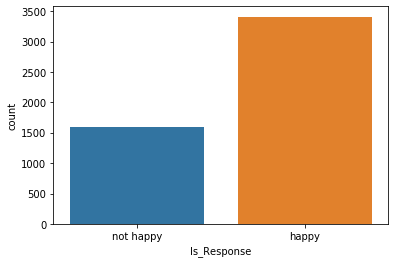

In [6]:
sns.countplot(df['Is_Response'])

In [7]:
df = df.rename(columns={"Description": "review", "Is_Response": "feeling"})

In [8]:
print ('Shape = >',df.shape)

Shape = > (5000, 2)


In [9]:
print ('The Value counts of feelings','\n',df.feeling.value_counts())

The Value counts of feelings 
 happy        3408
not happy    1592
Name: feeling, dtype: int64


In [10]:
#Ratio of the value counts
print ('Happy ratio = ', round(len(df[df['feeling']=='happy']) / len(df.feeling),2)*100,'%')
print ('Not happy ratio  = ', round(len(df[df['feeling']=='not happy']) / len(df.feeling),2)*100,'%')

Happy ratio =  68.0 %
Not happy ratio  =  32.0 %


In [11]:
# importing necessary libraries for pre processing texts
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation
import string
import re
wordnet=WordNetLemmatizer()

In [12]:
# pre processing the text
corpus=[]
for i in range(0,len(df)):
    review=re.sub('[^a-zA-Z]',' ', df['review'][i])
    review=review.lower()
    review=review.split()
    review=[wordnet.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [13]:
len(corpus)

5000

In [14]:
# labelling the target variable
df['feeling']=pd.get_dummies(df['feeling'])

In [15]:
df['feeling'].value_counts()

1    3408
0    1592
Name: feeling, dtype: int64

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

tvec=TfidfVectorizer()
cvec=CountVectorizer()
lreg=LogisticRegression()
gaus=GaussianNB()

x=cvec.fit_transform(corpus).toarray()

In [17]:
x.shape

(5000, 16047)

In [18]:
y=pd.DataFrame(df['feeling'])

In [19]:
#splitting data in to train & test
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=42,test_size=0.20)

In [20]:
# testing the data using countvectorizer
lreg.fit(train_x,train_y)
pred=lreg.predict(test_x)
acc_score=accuracy_score(pred,test_y)
print("Accuracy Score is", acc_score)
print(confusion_matrix(pred,test_y))
print(classification_report(pred,test_y))
print("The cross validation score is", cross_val_score(lreg,x,y,cv=5).mean())

Accuracy Score is 0.847
[[234  56]
 [ 97 613]]
              precision    recall  f1-score   support

           0       0.71      0.81      0.75       290
           1       0.92      0.86      0.89       710

    accuracy                           0.85      1000
   macro avg       0.81      0.84      0.82      1000
weighted avg       0.86      0.85      0.85      1000

The cross validation score is 0.8445918767918768


In [21]:
x=tvec.fit_transform(corpus).toarray()
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=42,test_size=0.20)

In [22]:
lreg.fit(train_x,train_y)
pred=lreg.predict(test_x)
acc_score=accuracy_score(pred,test_y)
print("Accuracy Score is", acc_score)
print(confusion_matrix(pred,test_y))
print(classification_report(pred,test_y))
print("The cross validation score is", cross_val_score(lreg,x,y,cv=5).mean())

Accuracy Score is 0.856
[[214  27]
 [117 642]]
              precision    recall  f1-score   support

           0       0.65      0.89      0.75       241
           1       0.96      0.85      0.90       759

    accuracy                           0.86      1000
   macro avg       0.80      0.87      0.82      1000
weighted avg       0.88      0.86      0.86      1000

The cross validation score is 0.8611978911978913


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

AS_score=[]
CV_score=[]

models=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),GaussianNB()]

for i in models:
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    print(i)
    score = accuracy_score(pred,test_y)
    print("\nAccuracy Score\n",score)
    AS_score.append(score)
    print(classification_report(pred,test_y))
    print(confusion_matrix)
    print("")
    cvscore = cross_val_score(i,x,y,cv=5).mean()
    print("\nThe cross validation score is\n", cvscore)
    CV_score.append(cvscore)
    


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy Score
 0.856
              precision    recall  f1-score   support

           0       0.65      0.89      0.75       241
           1       0.96      0.85      0.90       759

    accuracy                           0.86      1000
   macro avg       0.80      0.87      0.82      1000
weighted avg       0.88      0.86      0.86      1000

<function confusion_matrix at 0x000002197B4C4828>


The cross validation score is
 0.8611978911978913
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
         

In [24]:
# Logistic Regression is giving better score amongst the models

model_scores=pd.DataFrame({'Models':['LogisticRegression', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'SVC', 'GaussianNB'],'Accuracy Score':AS_score,'Cross Validation Score':CV_score})

model_scores


,Models,Accuracy Score,Cross Validation Score
0,LogisticRegression,0.856,0.861198
1,DecisionTreeClassifier,0.720,0.729795
2,KNeighborsClassifier,0.784,0.783799
3,SVC,0.669,0.681600
4,GaussianNB,0.560,0.555196


In [25]:
# Lets try if ensemble methods give better results
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
AS=[]
CV=[]

ensemble=[RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(), XGBClassifier()]
for i in ensemble:
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    print(i)
    score=accuracy_score(test_y,pred)
    print("Accuracy Score is", score)
    AS.append(score)
    cvscore=cross_val_score(i,x,y,cv=5).mean()
    print("The cross validation score is", cvscore)
    CV.append(cvscore)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy Score is 0.804
The cross validation score is 0.794598237998238
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
         

In [26]:
ensemble_score = pd.DataFrame({'Ensemble_Models':['Random Forest Classifier','Gradient Boosting Classifier','AdaBoost Classifier','XGB Classifier'],'Accuracy Score':AS,'Cross Validation Score':CV})

ensemble_score

,Ensemble_Models,Accuracy Score,Cross Validation Score
0,Random Forest Classifier,0.804,0.794598
1,Gradient Boosting Classifier,0.821,0.827398
2,AdaBoost Classifier,0.817,0.807191
3,XGB Classifier,0.848,0.845992


In [27]:
# Since Logistic Regression is performing better when compared to ensemble methods, 
#let us find best parameters using GridSearchcv for logistic regression
from sklearn.model_selection import GridSearchCV
grid={'C':np.logspace(-3,3.7), 'penalty':['l1','l2']}
gridcv=GridSearchCV(lreg,grid,cv=10)
gridcv.fit(train_x,train_y)
print(gridcv.best_params_)

{'C': 4.9185459691115625, 'penalty': 'l2'}


In [28]:
lreg=LogisticRegression(C=2.62,penalty='l2')
lreg.fit(train_x,train_y)
pred=lreg.predict(test_x)
print("Accuracy Score is", accuracy_score(test_y,pred))
print("The cross validation score is", cross_val_score(lreg,x,y,cv=5).mean())
print(classification_report(test_y,pred))
print(confusion_matrix(test_y,pred))

Accuracy Score is 0.868
The cross validation score is 0.865592495792496
              precision    recall  f1-score   support

           0       0.88      0.69      0.78       331
           1       0.86      0.95      0.91       669

    accuracy                           0.87      1000
   macro avg       0.87      0.82      0.84      1000
weighted avg       0.87      0.87      0.86      1000

[[230 101]
 [ 31 638]]


In [29]:
# The results have slightly increased. Hence, we can finalise the model
from sklearn.externals import joblib
joblib.dump(lreg,'Hotel_Sentiment_LG.pkl')

['Hotel_Sentiment_LG.pkl']

In [30]:
# Testing results on the test data
df_test=pd.read_csv("htest.csv")
df_test.head()

,User_ID,Description,Browser_Used,Device_Used
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile


In [31]:
df_test = df_test.head(5000)

In [32]:
#Dropping unwanted columns
df_test = df_test.drop(columns=['User_ID', 'Browser_Used', 'Device_Used'])

In [33]:
print ('Shape = >',df_test.shape)

Shape = > (5000, 1)


In [34]:
testcorpus=[]
for i in range(0,len(df_test)):
    review=re.sub('[^a-zA-Z]',' ', df_test['Description'][i])
    review=review.lower()
    review=review.split()
    review=[wordnet.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    testcorpus.append(review)

In [35]:
testcorpus

['looking motel close proximity tv taping dr phil show chose dune sunset blvd west hollywood although property displayed aaa emblem certainly left lot desired chip scrape bottom door frame bathroom lotion container half full apparently replaced housekeeping needed early wakeup call use clock radio alarm radio room tv channel listing remote tv menu making viewing chore tv remote returned checking place served purpose place revisit',
 'walking distance madison square garden penn subway station also close lot retail store restaurant hotel offer free internet gym hot breakfast room top floor facing th st room clean staff helpful accommodating downside c making noise faucet bathroom loose thing easily fixed walked hotel madison square garden time square broadway everything considered definitely recommend hotel friend',
 'visited seattle business spent night vintage park great location room nice bathroom nice clean thermostat work open window cool room upon check asked wanted turn service sa

In [36]:
x=tvec.fit_transform(corpus)
x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
# Using only transform to the testcorpus so that it is trained on the basis on already trained training dataset
# This ensures the dimensions of both training and test dataset are the same
testdata=tvec.transform(testcorpus).toarray()

In [38]:
testdata.shape

(5000, 16047)

In [39]:
predtest=pd.DataFrame(lreg.predict(testdata))
predtest.to_csv('prediction_testdata.csv')